In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.utils import shuffle
df = pd.read_csv("Fake.csv")

tf = pd.read_csv("True.csv")

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


In [8]:
kf = pd.read_csv("l.csv",index_col=0)
key = pd.read_csv("key.csv",index_col=0)

In [9]:
key = key.reset_index().rename(columns={"index":"num"})

In [10]:
kf = kf.reset_index(drop=True)


In [11]:
listy = []
for i, x in list(kf.iterrows()):
    listy+=[[y, i] for y in word_tokenize(x["n-title"])]

In [12]:
df = pd.DataFrame(listy,columns=["word","id"]).reset_index()
tf = key.merge(df, left_on="words",right_on="word")

In [13]:
tf = tf.sort_values(by="index")
k = [[x[0],x[1].values] for x in tf.groupby(["id"])["num"]]


In [14]:
k = pd.DataFrame(k,columns=["index","values"])
kf = kf.merge(k, right_on="index", left_index=True)

In [15]:
y = kf.type
X = kf["values"]

In [16]:
def fix(x):
    if len(x) > 20:
        return x[:20]
    return np.array([0 for x in range(20-len(x))] + list(x))
def normalize(values):
    return [fix(x)for x in values]
X = normalize(X)

In [17]:
#np.array([1,4,5]) + np.array([[1],[2],[3],[2]])

In [18]:
X = np.array(X)

In [19]:
highest = []
for x in kf["values"]:
    highest.append(len(x))
max(highest)

39

(array([9.5000e+01, 1.1213e+04, 2.0178e+04, 8.4940e+03, 2.6650e+03,
        1.5830e+03, 4.8600e+02, 1.3000e+02, 4.1000e+01, 1.3000e+01]),
 array([ 1. ,  4.8,  8.6, 12.4, 16.2, 20. , 23.8, 27.6, 31.4, 35.2, 39. ]),
 <a list of 10 Patch objects>)

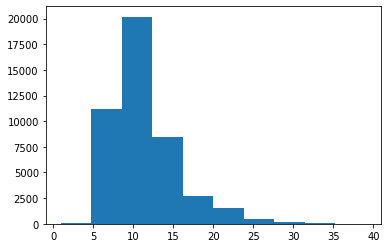

In [20]:
import matplotlib.pyplot as plt 
counts, bins = np.histogram(highest)
plt.hist(bins[:-1], bins, weights=counts)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #default shuffle = True but random state = 42 means always same random shuffle


In [27]:
len(key)

218605

In [28]:
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout
from tensorflow.keras.models import Sequential
#from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(218605,embedding_vector_features,input_length=20)) ## embedding layer used 40 features to make feature representation of the sentences
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3)) ## drop out layer to make the model more regularized
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary()) ## model architechture done


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            8744200   
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 8,800,701
Trainable params: 8,800,701
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
model.fit(x_train, y_train, validation_split=.2, epochs=2, batch_size=5, verbose=1)

Epoch 1/2
5747/5747 [==============================] - 408s 71ms/step - loss: 0.0195 - accuracy: 0.9930 - val_loss: 0.0204 - val_accuracy: 0.9921
Epoch 2/2
5747/5747 [==============================] - 411s 72ms/step - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.0274 - val_accuracy: 0.9901


In [174]:
np.array([1,2]).reshape(-1,1)

array([[1],
       [2]])

In [31]:
model.save("words.h5")


In [43]:
predictions = model.predict(x_test).astype("int")

In [53]:
len(y_test[predictions.reshape(1,-1)[0] == y_test])/len(y_test)

0.5903118040089087

In [35]:
round(5.33,0)

5.0

In [ ]:
#If I tested with other data, I have to use the same key because model remembers certain numbers which are associated with certain words and targets
